In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Cleaning

In [2]:
bi_1 = pd.read_excel('/Users/chaoiting/Desktop/competition/IAC_5.0/IAC_5_Dataset.xlsx', sheet_name='Basic Indicators', skiprows=2,\
                     skipfooter=39,header =[1, 2])
bi_1.drop(bi_1.columns[[0,15,17,18,19,20,21,22,23]], axis=1, inplace = True) # drop the columns
bi_1.drop(bi_1.index[0],inplace=True) # drop the first row
bi_1.replace(['–','x'], np.nan, inplace=True)

bi_1.head()

Countries and areas Under–5 mortality rank Under–5 mortality rate         \
   Unnamed: 1_level_1     Unnamed: 2_level_1                    1990  2016   
1         Afghanistan                   25.0                   177.0  70.0   
2             Albania                  114.0                    40.0  14.0   
3             Algeria                   78.0                    49.0  25.0   
4             Andorra                  179.0                     9.0   3.0   
5              Angola                   17.0                   221.0  83.0   

  Under–5 mortality rate by sex\n2016        Infant mortality rate (under 1)  \
                                 male female                            1990   
1                                74.0   66.0                           120.0   
2                                15.0   12.0                            35.0   
3                                27.0   24.0                            41.0   
4                                 3.0    3.0                             7.0   
5                                88.0   76.0                           131.0   

        Neonatal  mortality rate Total population (thousands)  \
   2016                     2016                         2016   
1  53.0                     40.0                    34656.032   
2  12.0                      6.0                     2926.348   
3  22.0                     16.0                    40606.052   
4   2.0                      1.0                       77.281   
5  55.0                     29.0                    28813.463   

  Annual number of births (thousands)  \
                                 2016   
1                            1142.962   
2                              34.750   
3                             949.277   
4                                 NaN   
5                            1180.970   

  Annual number of under–5 deaths (thousands)  \
                                         2016   
1                                        80.0   
2                                         0.0   
3                                        24.0   
4                                         0.0   
5                                        96.0   

  Life expectancy at birth (years) Total adult literacy rate          (%)  \
                              2016                             2011−2016*   
1                           63.673                               31.74112   
2                           78.345                               97.24697   
3                           76.078                               75.13605   
4                              NaN                              100.00000   
5                           61.547                               66.03011   

  Primary school net enrolment ratio                    (%)  
                                                 2011−2016*  
1                                                NaN         
2                                           95.51731         
3                                           97.06215         
4                                                NaN         
5                                           84.01231

In [3]:
country = bi_1.iloc[:, 0].tolist()
Under5_mortality_rate = bi_1.iloc[:, 3].tolist()
Primary_school_net_enrolment_ratio = bi_1.iloc[:, 14].tolist()
basic_indicator = pd.DataFrame(np.array([country, Under5_mortality_rate, Primary_school_net_enrolment_ratio]), 
                               index = ['country', 'Under5_mortality_rate', 'Primary_school_net_enrolment_ratio'])
basic_indicator = basic_indicator.T
basic_indicator

,country,Under5_mortality_rate,Primary_school_net_enrolment_ratio
0,Afghanistan,70.0,nan
1,Albania,14.0,95.51731
2,Algeria,25.0,97.06215
3,Andorra,3.0,nan
4,Angola,83.0,84.01231
...,...,...,...
197,Venezuela (Bolivarian Republic of),16.0,89.85675
198,Viet Nam,22.0,97.96511
199,Yemen,55.0,84.83733
200,Zambia,63.0,87.40411


In [4]:
basic_indicator.replace(['nan', 'NaN'], np.nan, inplace=True)
basic_indicator.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 3 columns):
country                               202 non-null object
Under5_mortality_rate                 195 non-null object
Primary_school_net_enrolment_ratio    181 non-null object
dtypes: object(3)
memory usage: 4.9+ KB


In [5]:
heal_3 = pd.read_excel('/Users/chaoiting/Desktop/competition/IAC_5.0/IAC_5_Dataset.xlsx', sheet_name='Health', skiprows=2,\
                     skipfooter=56,header =[1,2])
heal_3.drop(heal_3.columns[[0,19,21,23,25,27,29]], axis=1, inplace = True) # drop the columns
heal_3.drop(heal_3.index[[0,1,2]],inplace=True) # drop the first row
heal_3.replace(['–','x'], np.nan, inplace=True)

heal_3.head()

Countries and areas Use of basic drinking water services             (%)  \
   Unnamed: 1_level_1                                   Unnamed: 2_level_1   
3         Afghanistan                                          62.980208     
4             Albania                                          91.394333     
5             Algeria                                          93.466427     
6             Andorra                                         100.000000     
7              Angola                                          41.005868     

                                        Use of basic sanitation services (%)  \
  Unnamed: 3_level_1 Unnamed: 4_level_1                   Unnamed: 5_level_1   
3          89.048629          53.483161                            39.220433   
4          92.521470          89.875174                            97.690655   
5          95.442932          88.690957                            87.487686   
6         100.000000         100.000000                           100.000000   
7          63.256062          23.488065                            39.429423   

                                        Immunization coverage (%)              \
  Unnamed: 6_level_1 Unnamed: 7_level_1                       BCG DTP1β DTP3β   
3          56.404706          32.959991                      74.0  73.0  65.0   
4          98.288014          96.885533                      99.0  99.0  98.0   
5          89.672369          82.209238                      99.0  96.0  91.0   
6         100.000000         100.000000                       NaN  99.0  98.0   
7          62.347862          21.385504                      58.0  79.0  64.0   

   ...                                                                      \
   ... HepB3  Hib3  rota  PCV3 Protection at birth (PAB) against tetanusλ    
3  ...  65.0  65.0   0.0  65.0                                        65.0   
4  ...  98.0  98.0   0.0  98.0                                        92.0   
5  ...  91.0  91.0   0.0  61.0                                        92.0   
6  ...  94.0  98.0   0.0  92.0                                         NaN   
7  ...  64.0  64.0  53.0  58.0                                        78.0   

                                                                Pneumonia  \
  Care seeking for children with symptoms of pneumonia                (%)   
3                                               61.5                        
4                                               69.6                        
5                                               66.4                        
6                                                NaN                        
7                                               49.0                        

                                        Diarrhoea  \
  Treatment with oral rehydration salts (ORS) (%)   
3                                            46.2   
4                                            54.0   
5                                            25.3   
6                                             NaN   
7                                            42.6   

                                             Malaria  \
  Care seeking for children with fever           (%)   
3                                               63.2   
4                                               71.2   
5                                                NaN   
6                                                NaN   
7                                               50.8   

                                                \
  Children sleeping under ITNs             (%)   
3                                          4.6   
4                                          NaN   
5                                          NaN   
6                                          NaN   
7                                         21.7   

                                               
  Households with at least one ITN        (%)  
3                          

In [6]:
immunization = heal_3.iloc[:, 7:18]
immunization.head()

Immunization coverage (%)                                                   \
                        BCG DTP1β DTP3β polio3  MCV1 MCV2^ HepB3  Hib3  rota   
3                      74.0  73.0  65.0   60.0  62.0  39.0  65.0  65.0   0.0   
4                      99.0  99.0  98.0   98.0  96.0  98.0  98.0  98.0   0.0   
5                      99.0  96.0  91.0   91.0  94.0  96.0  91.0  91.0   0.0   
6                       NaN  99.0  98.0   98.0  97.0  90.0  94.0  98.0   0.0   
7                      58.0  79.0  64.0   66.0  49.0  26.0  64.0  64.0  53.0   

                                                     
   PCV3 Protection at birth (PAB) against tetanusλ   
3  65.0                                        65.0  
4  98.0                                        92.0  
5  61.0                                        92.0  
6  92.0                                         NaN  
7  58.0                                        78.0

In [7]:
immunization.columns = ['_'.join(col) for col in immunization.columns]
immunization.columns

Index(['Immunization coverage (%)_BCG', 'Immunization coverage (%)_DTP1β',
       'Immunization coverage (%)_DTP3β', 'Immunization coverage (%)_polio3',
       'Immunization coverage (%)_MCV1', 'Immunization coverage (%)_MCV2^',
       'Immunization coverage (%)_HepB3', 'Immunization coverage (%)_Hib3',
       'Immunization coverage (%)_rota', 'Immunization coverage (%)_PCV3',
       'Immunization coverage (%)_Protection at birth (PAB) against tetanusλ '],
      dtype='object')

In [8]:
immunization.rename(columns={'Immunization coverage (%)_BCG': "BCG"}, inplace = True)
immunization.rename(columns={'Immunization coverage (%)_DTP1β': "DTP1β"}, inplace = True)
immunization.rename(columns={'Immunization coverage (%)_DTP3β': "DTP3β"}, inplace = True)
immunization.rename(columns={'Immunization coverage (%)_polio3': "polio3"}, inplace = True)
immunization.rename(columns={'Immunization coverage (%)_MCV1': "MCV1"}, inplace = True)
immunization.rename(columns={'Immunization coverage (%)_MCV2^': "MCV2"}, inplace = True)
immunization.rename(columns={'Immunization coverage (%)_HepB3': "HepB3"}, inplace = True)
immunization.rename(columns={'Immunization coverage (%)_Hib3': "Hib3"}, inplace = True)
immunization.rename(columns={'Immunization coverage (%)_rota': "rota"}, inplace = True)
immunization.rename(columns={'Immunization coverage (%)_PCV3': "PCV3"}, inplace = True)
immunization.rename(columns={'Immunization coverage (%)_Protection at birth (PAB) against tetanusλ ': "PAB_against_tetanus"}, inplace = True)
immunization.reset_index(drop=True, inplace=True)
immunization

,BCG,DTP1β,DTP3β,polio3,MCV1,MCV2,HepB3,Hib3,rota,PCV3,PAB_against_tetanus
0,74.0,73.0,65.0,60.0,62.0,39.0,65.0,65.0,0.0,65.0,65.0
1,99.0,99.0,98.0,98.0,96.0,98.0,98.0,98.0,0.0,98.0,92.0
2,99.0,96.0,91.0,91.0,94.0,96.0,91.0,91.0,0.0,61.0,92.0
3,NaN,99.0,98.0,98.0,97.0,90.0,94.0,98.0,0.0,92.0,NaN
4,58.0,79.0,64.0,66.0,49.0,26.0,64.0,64.0,53.0,58.0,78.0
...,...,...,...,...,...,...,...,...,...,...,...
197,99.0,98.0,84.0,82.0,88.0,53.0,84.0,84.0,47.0,7.0,75.0
198,95.0,96.0,96.0,95.0,99.0,95.0,96.0,96.0,0.0,0.0,94.0
199,73.0,76.0,71.0,65.0,70.0,49.0,71.0,71.0,59.0,71.0,70.0
200,99.0,99.0,91.0,87.0,93.0,58.0,91.0,91.0,90.0,90.0,85.0


In [9]:
country = heal_3.iloc[:, 0].tolist()
drinkingwater_services = heal_3.iloc[:, 1].tolist()
sanitation_service = heal_3.iloc[:, 4].tolist()
health = pd.DataFrame(np.array([country, drinkingwater_services, sanitation_service]), 
                               index = ['country', 'drinkingwater_services', 'sanitation_service'])
health = health.T
health.head()

,country,drinkingwater_services,sanitation_service
0,Afghanistan,62.98020808041154,39.22043325001997
1,Albania,91.39433316358014,97.69065534071956
2,Algeria,93.46642652733445,87.4876863565245
3,Andorra,100.0,100.0
4,Angola,41.00586761679718,39.42942284072073


In [10]:
health = pd.merge(health,immunization, left_index = True, right_index = True)
health

,country,drinkingwater_services,sanitation_service,BCG,DTP1β,DTP3β,polio3,MCV1,MCV2,HepB3,Hib3,rota,PCV3,PAB_against_tetanus
0,Afghanistan,62.98020808041154,39.22043325001997,74.0,73.0,65.0,60.0,62.0,39.0,65.0,65.0,0.0,65.0,65.0
1,Albania,91.39433316358014,97.69065534071956,99.0,99.0,98.0,98.0,96.0,98.0,98.0,98.0,0.0,98.0,92.0
2,Algeria,93.46642652733445,87.4876863565245,99.0,96.0,91.0,91.0,94.0,96.0,91.0,91.0,0.0,61.0,92.0
3,Andorra,100.0,100.0,NaN,99.0,98.0,98.0,97.0,90.0,94.0,98.0,0.0,92.0,NaN
4,Angola,41.00586761679718,39.42942284072073,58.0,79.0,64.0,66.0,49.0,26.0,64.0,64.0,53.0,58.0,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Venezuela (Bolivarian Republic of),97.4172239371494,94.9343895728997,99.0,98.0,84.0,82.0,88.0,53.0,84.0,84.0,47.0,7.0,75.0
198,Viet Nam,91.19176623837923,78.23744781117028,95.0,96.0,96.0,95.0,99.0,95.0,96.0,96.0,0.0,0.0,94.0
199,Yemen,70.35886323431684,59.68267989473678,73.0,76.0,71.0,65.0,70.0,49.0,71.0,71.0,59.0,71.0,70.0
200,Zambia,61.22530759156018,31.11180988210136,99.0,99.0,91.0,87.0,93.0,58.0,91.0,91.0,90.0,90.0,85.0


In [11]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 14 columns):
country                   202 non-null object
drinkingwater_services    202 non-null object
sanitation_service        202 non-null object
BCG                       160 non-null float64
DTP1β                     195 non-null float64
DTP3β                     195 non-null float64
polio3                    195 non-null float64
MCV1                      195 non-null float64
MCV2                      195 non-null float64
HepB3                     195 non-null float64
Hib3                      195 non-null float64
rota                      195 non-null float64
PCV3                      195 non-null float64
PAB_against_tetanus       106 non-null float64
dtypes: float64(11), object(3)
memory usage: 22.2+ KB


In [12]:
health.replace(['nan', 'NaN'], np.nan, inplace=True)
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 14 columns):
country                   202 non-null object
drinkingwater_services    199 non-null object
sanitation_service        199 non-null object
BCG                       160 non-null float64
DTP1β                     195 non-null float64
DTP3β                     195 non-null float64
polio3                    195 non-null float64
MCV1                      195 non-null float64
MCV2                      195 non-null float64
HepB3                     195 non-null float64
Hib3                      195 non-null float64
rota                      195 non-null float64
PCV3                      195 non-null float64
PAB_against_tetanus       106 non-null float64
dtypes: float64(11), object(3)
memory usage: 22.2+ KB


In [13]:
edu_5 = pd.read_excel('/Users/chaoiting/Desktop/competition/IAC_5.0/IAC_5_Dataset.xlsx', sheet_name='Education', skiprows=2,\
                     skipfooter=47,header =[1,2])
edu_5.drop(edu_5.columns[[0, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41]],\
           axis=1, inplace = True) # drop the columns
edu_5.drop(edu_5.index[[0,1,2]],inplace=True) # drop the first row
edu_5.replace(['–','x'], np.nan, inplace=True)

edu_5.head()

Countries and areas Youth (15–24 years) literacy rate                (%)  \
   Unnamed: 1_level_1                                   Unnamed: 2_level_1   
3         Afghanistan                                           61.87907     
4             Albania                                           99.37598     
5             Algeria                                           95.74706     
6             Andorra                                          100.00000     
7              Angola                                           84.86238     

                     Number per 100 population                      \
  Unnamed: 4_level_1         Unnamed: 6_level_1 Unnamed: 8_level_1   
3           32.11322                  66.003744          10.595726   
4           99.02019                 105.062312          66.363445   
5           91.73993                 117.020110          42.945527   
6          100.00000                  87.189733          97.930637   
7           70.58513                  55.275647          13.000000   

       Pre-primary school participation  \
  Gross enrolment ratio             (%)   
3                                   NaN   
4                              89.72232   
5                              78.95678   
6                                   NaN   
7                              64.20847   

                                          Primary school participation  \
  Gross enrolment ratio             (%).2    Gross enrolment ratio (%)   
3                                     NaN                    131.62293   
4                                87.39891                    115.52430   
5                                79.47712                    119.52922   
6                                     NaN                          NaN   
7                                94.40013                    156.89613   

                                                       ...  \
  Gross enrolment ratio (%).2 Net enrolment ratio (%)  ...   
3                    91.08326                     NaN  ...   
4                   111.71902                96.21119  ...   
5                   112.67534                     NaN  ...   
6                         NaN                     NaN  ...   
7                   100.38635                94.92857  ...   

                                                       \
  Net attendance ratio (%) Net attendance ratio (%).2   
3                     73.1                       53.2   
4                     92.2                       92.6   
5                     97.5                       97.4   
6                      NaN                        NaN   
7                     76.1                       75.6   

                                                            \
  Out-of-school rate of children of primary school age (%)   
3                                                NaN         
4                                            3.47901         
5                                                NaN         
6                                                NaN         
7                                            5.07143         

                                                              \
  Out-of-school rate of children of primary school age (%).2   
3                                                NaN           
4                                            4.74979           
5                                                NaN           
6                                                NaN           
7                                           26.95268           

                                            \
  Survival rate to last primary grade (%)    
3                                      NaN   
4                                 95.12022   
5                                 93.01003   
6                                 70.97962   
7                                      NaN   

                                              \
  Survival rate to last primary grade (%) .2   
3    

In [14]:
country = edu_5.iloc[:, 0].tolist()
mobile_phone = edu_5.iloc[:, 3].tolist()
internet = edu_5.iloc[:, 4].tolist()
education = pd.DataFrame(np.array([country, mobile_phone, internet]), 
                         index = ['country', 'mobile_phone', 'internet'])
education = education.T
education.head()

,country,mobile_phone,internet
0,Afghanistan,66.0037444621795,10.5957264186601
1,Albania,105.062312386278,66.363444701023
2,Algeria,117.020110194964,42.9455268800332
3,Andorra,87.1897331551916,97.9306371220021
4,Angola,55.2756468732335,13.0


In [15]:
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 3 columns):
country         202 non-null object
mobile_phone    202 non-null object
internet        202 non-null object
dtypes: object(3)
memory usage: 4.9+ KB


In [16]:
education.replace(['nan', 'NaN'], np.nan, inplace=True)
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 3 columns):
country         202 non-null object
mobile_phone    201 non-null object
internet        200 non-null object
dtypes: object(3)
memory usage: 4.9+ KB


In [17]:
demo_6 = pd.read_excel('/Users/chaoiting/Desktop/competition/IAC_5.0/IAC_5_Dataset.xlsx', sheet_name='Demographic Indicators', skiprows=2,\
                     skipfooter=35,header =[1,2])
demo_6.drop(demo_6.columns[0], axis=1, inplace = True) # drop the columns
demo_6.drop(demo_6.index[[0,1]],inplace=True) # drop the first row
demo_6.replace(['–','x'], np.nan, inplace=True)

demo_6.head()

Countries and areas Population (thousands)                             \
   Unnamed: 1_level_1                   2016        2016.1       2016.2   
2         Afghanistan              34656.032  17743.518000  5232.848000   
3             Albania               2926.348    659.259000   177.372000   
4             Algeria              40606.052  13495.144000  4699.122000   
5             Andorra                 77.281     13.383259     3.410533   
6              Angola              28813.463  15415.799000  5277.122000   

  Population annual growth rate                    (%)                     \
                                    Unnamed: 5_level_1 Unnamed: 6_level_1   
2                                           4.000070             2.130447   
3                                          -0.440505             0.017239   
4                                           1.727680             1.316165   
5                                           1.342624             0.080236   
6                                           3.314425             3.138611   

    Crude death rate                                        \
  Unnamed: 7_level_1 Unnamed: 8_level_1 Unnamed: 9_level_1   
2             27.624             15.577              6.747   
3              7.996              5.989              7.379   
4             16.633              6.307              4.765   
5                NaN                NaN                NaN   
6             27.498             22.910              8.513   

     Crude birth rate                                          \
  Unnamed: 10_level_1 Unnamed: 11_level_1 Unnamed: 12_level_1   
2              51.648              49.080              33.214   
3              31.821              24.789              11.816   
4              47.021              32.132              23.132   
5                 NaN                 NaN                 NaN   
6              53.375              52.749              41.819   

      Life expectancy                                          \
  Unnamed: 13_level_1 Unnamed: 14_level_1 Unnamed: 15_level_1   
2              36.678              49.856              63.673   
3              66.933              71.836              78.345   
4              50.369              66.725              76.078   
5                 NaN                 NaN                 NaN   
6              37.047              41.696              61.547   

  Total fertility rate Urbanized population               (%)  \
   Unnamed: 16_level_1                    Unnamed: 17_level_1   
2                4.635                                 27.132   
3                1.713                                 58.376   
4                2.776                                 71.304   
5                  NaN                                 84.612   
6                5.694                                 44.819   

  Average annual growth rate of urban population             (%)  \
                                             Unnamed: 18_level_1   
2                                           5.457640               
3                                           1.536729               
4                                           2.954082               
5                                           1.117164               
6                                           5.320008               

                       
  Unnamed: 19_level_1  
2            3.642832  
3            1.396647  
4            1.736718  
5            0.228306  
6            4.173645

In [18]:
country = demo_6.iloc[:, 0].tolist()
pop_total = demo_6.iloc[:, 1].tolist()
pop_under5 = demo_6.iloc[:, 3].tolist()
pop_urbanized = demo_6.iloc[:, 16].tolist()
demographic = pd.DataFrame(np.array([country, pop_total, pop_under5, pop_urbanized]), 
                         index = ['country', 'pop_total', 'pop_under5', 'pop_urbanized'])
demographic = demographic.T
demographic.head()

,country,pop_total,pop_under5,pop_urbanized
0,Afghanistan,34656.032,5232.848,27.132
1,Albania,2926.348,177.372,58.376
2,Algeria,40606.052,4699.122,71.304
3,Andorra,77.281,3.4105331011812834,84.612
4,Angola,28813.463,5277.122,44.819


In [19]:
demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 4 columns):
country          202 non-null object
pop_total        202 non-null object
pop_under5       202 non-null object
pop_urbanized    202 non-null object
dtypes: object(4)
memory usage: 6.4+ KB


In [20]:
demographic.replace(['nan', 'NaN'], np.nan, inplace=True)
demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 4 columns):
country          202 non-null object
pop_total        202 non-null object
pop_under5       202 non-null object
pop_urbanized    202 non-null object
dtypes: object(4)
memory usage: 6.4+ KB


In [21]:
df_test = pd.merge(basic_indicator, health, on = 'country', how = 'outer')
df_test

,country,Under5_mortality_rate,Primary_school_net_enrolment_ratio,drinkingwater_services,sanitation_service,BCG,DTP1β,DTP3β,polio3,MCV1,MCV2,HepB3,Hib3,rota,PCV3,PAB_against_tetanus
0,Afghanistan,70.0,NaN,62.98020808041154,39.22043325001997,74.0,73.0,65.0,60.0,62.0,39.0,65.0,65.0,0.0,65.0,65.0
1,Albania,14.0,95.51731,91.39433316358014,97.69065534071956,99.0,99.0,98.0,98.0,96.0,98.0,98.0,98.0,0.0,98.0,92.0
2,Algeria,25.0,97.06215,93.46642652733445,87.4876863565245,99.0,96.0,91.0,91.0,94.0,96.0,91.0,91.0,0.0,61.0,92.0
3,Andorra,3.0,NaN,100.0,100.0,NaN,99.0,98.0,98.0,97.0,90.0,94.0,98.0,0.0,92.0,NaN
4,Angola,83.0,84.01231,41.00586761679718,39.42942284072073,58.0,79.0,64.0,66.0,49.0,26.0,64.0,64.0,53.0,58.0,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Zambia,63.0,87.40411,61.22530759156018,31.11180988210136,99.0,99.0,91.0,87.0,93.0,58.0,91.0,91.0,90.0,90.0,85.0
201,Zimbabwe,56.0,85.86239,66.56310130919559,38.5886188198639,95.0,94.0,90.0,90.0,95.0,63.0,90.0,90.0,91.0,90.0,80.0
202,Central African Republic,NaN,NaN,54.14386029135174,25.08699975131816,74.0,69.0,47.0,47.0,49.0,0.0,47.0,47.0,0.0,47.0,60.0
203,Guinea-Bissau,NaN,NaN,69.19660862748137,21.46600374966575,94.0,95.0,87.0,87.0,81.0,0.0,87.0,87.0,61.0,80.0,80.0


In [22]:
df = pd.merge(basic_indicator, health, left_index = True, right_index = True)
df = pd.merge(df, education, left_index = True, right_index = True)
df = pd.merge(df, demographic, left_index = True, right_index = True)
df

,country_x,Under5_mortality_rate,Primary_school_net_enrolment_ratio,country_y,drinkingwater_services,sanitation_service,BCG,DTP1β,DTP3β,polio3,...,rota,PCV3,PAB_against_tetanus,country_x,mobile_phone,internet,country_y,pop_total,pop_under5,pop_urbanized
0,Afghanistan,70.0,NaN,Afghanistan,62.98020808041154,39.22043325001997,74.0,73.0,65.0,60.0,...,0.0,65.0,65.0,Afghanistan,66.0037444621795,10.5957264186601,Afghanistan,34656.032,5232.848,27.132
1,Albania,14.0,95.51731,Albania,91.39433316358014,97.69065534071956,99.0,99.0,98.0,98.0,...,0.0,98.0,92.0,Albania,105.062312386278,66.363444701023,Albania,2926.348,177.372,58.376
2,Algeria,25.0,97.06215,Algeria,93.46642652733445,87.4876863565245,99.0,96.0,91.0,91.0,...,0.0,61.0,92.0,Algeria,117.020110194964,42.9455268800332,Algeria,40606.052,4699.122,71.304
3,Andorra,3.0,NaN,Andorra,100.0,100.0,NaN,99.0,98.0,98.0,...,0.0,92.0,NaN,Andorra,87.1897331551916,97.9306371220021,Andorra,77.281,3.4105331011812834,84.612
4,Angola,83.0,84.01231,Angola,41.00586761679718,39.42942284072073,58.0,79.0,64.0,66.0,...,53.0,58.0,78.0,Angola,55.2756468732335,13.0,Angola,28813.463,5277.122,44.819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Venezuela (Bolivarian Republic of),16.0,89.85675,Venezuela (Bolivarian Republic of),97.4172239371494,94.9343895728997,99.0,98.0,84.0,82.0,...,47.0,7.0,75.0,Venezuela (Bolivarian Republic of),86.9898172888433,60.0,Venezuela (Bolivarian Republic of),31568.179,2974.249,89.043
198,Viet Nam,22.0,97.96511,Viet Nam,91.19176623837923,78.23744781117028,95.0,96.0,96.0,95.0,...,0.0,0.0,94.0,Viet Nam,128.037926118757,46.5,Viet Nam,94569.072,7760.728,34.236
199,Yemen,55.0,84.83733,Yemen,70.35886323431684,59.68267989473678,73.0,76.0,71.0,65.0,...,59.0,71.0,70.0,Yemen,67.1699021229267,24.5792083636211,Yemen,27584.213,4075.161,35.187
200,Zambia,63.0,87.40411,Zambia,61.22530759156018,31.11180988210136,99.0,99.0,91.0,87.0,...,90.0,90.0,85.0,Zambia,74.9477419195499,25.5065788475702,Zambia,16591.39,2820.123,41.379


In [23]:
df.loc[df.iloc[:,3]=='Central African Republic ']

,country_x,Under5_mortality_rate,Primary_school_net_enrolment_ratio,country_y,drinkingwater_services,sanitation_service,BCG,DTP1β,DTP3β,polio3,...,rota,PCV3,PAB_against_tetanus,country_x,mobile_phone,internet,country_y,pop_total,pop_under5,pop_urbanized
34,Central African Republic,124.0,70.55846,Central African Republic,54.14386029135174,25.08699975131816,74.0,69.0,47.0,47.0,...,0.0,47.0,60.0,Central African Republic,25.4878092602907,4.0,Central African Republic,4594.621,730.455,40.332


In [24]:
df.loc[df.iloc[:,3]=='Guinea-Bissau']

,country_x,Under5_mortality_rate,Primary_school_net_enrolment_ratio,country_y,drinkingwater_services,sanitation_service,BCG,DTP1β,DTP3β,polio3,...,rota,PCV3,PAB_against_tetanus,country_x,mobile_phone,internet,country_y,pop_total,pop_under5,pop_urbanized
73,Guinea–Bissau,88.0,68.23333,Guinea-Bissau,69.19660862748137,21.46600374966575,94.0,95.0,87.0,87.0,...,61.0,80.0,80.0,Guinea-Bissau,70.2596388540855,3.761413832337,Guinea-Bissau,1815.698,290.838,50.094


In [25]:
df.loc[df.iloc[:,3]=='Timor-Leste']

,country_x,Under5_mortality_rate,Primary_school_net_enrolment_ratio,country_y,drinkingwater_services,sanitation_service,BCG,DTP1β,DTP3β,polio3,...,rota,PCV3,PAB_against_tetanus,country_x,mobile_phone,internet,country_y,pop_total,pop_under5,pop_urbanized
178,Timor–Leste,50.0,95.59233,Timor-Leste,70.22330007176694,44.0110559646928,85.0,95.0,85.0,83.0,...,0.0,0.0,81.0,Timor-Leste,125.005361714676,25.24624959,Timor-Leste,1268.671,206.095,33.401


In [26]:
#remove countries having more than 15 missing value
df = df[df.isnull().sum(axis=1) < 5]
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
country_x                             195 non-null object
Under5_mortality_rate                 195 non-null object
Primary_school_net_enrolment_ratio    179 non-null object
country_y                             195 non-null object
drinkingwater_services                193 non-null object
sanitation_service                    193 non-null object
BCG                                   160 non-null float64
DTP1β                                 195 non-null float64
DTP3β                                 195 non-null float64
polio3                                195 non-null float64
MCV1                                  195 non-null float64
MCV2                                  195 non-null float64
HepB3                                 195 non-null float64
Hib3                                  195 non-null float64
rota                                  195 non-null float64
PCV3            

In [27]:
# drop columns having over 10% missing value
df.drop(df.columns[[6,16]], axis=1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 22 columns):
country_x                             195 non-null object
Under5_mortality_rate                 195 non-null object
Primary_school_net_enrolment_ratio    179 non-null object
country_y                             195 non-null object
drinkingwater_services                193 non-null object
sanitation_service                    193 non-null object
DTP1β                                 195 non-null float64
DTP3β                                 195 non-null float64
polio3                                195 non-null float64
MCV1                                  195 non-null float64
MCV2                                  195 non-null float64
HepB3                                 195 non-null float64
Hib3                                  195 non-null float64
rota                                  195 non-null float64
PCV3                                  195 non-null float64
country_x       

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [28]:
df

,country_x,Under5_mortality_rate,Primary_school_net_enrolment_ratio,country_y,drinkingwater_services,sanitation_service,DTP1β,DTP3β,polio3,MCV1,...,Hib3,rota,PCV3,country_x,mobile_phone,internet,country_y,pop_total,pop_under5,pop_urbanized
0,Afghanistan,70.0,NaN,Afghanistan,62.98020808041154,39.22043325001997,73.0,65.0,60.0,62.0,...,65.0,0.0,65.0,Afghanistan,66.0037444621795,10.5957264186601,Afghanistan,34656.032,5232.848,27.132
1,Albania,14.0,95.51731,Albania,91.39433316358014,97.69065534071956,99.0,98.0,98.0,96.0,...,98.0,0.0,98.0,Albania,105.062312386278,66.363444701023,Albania,2926.348,177.372,58.376
2,Algeria,25.0,97.06215,Algeria,93.46642652733445,87.4876863565245,96.0,91.0,91.0,94.0,...,91.0,0.0,61.0,Algeria,117.020110194964,42.9455268800332,Algeria,40606.052,4699.122,71.304
3,Andorra,3.0,NaN,Andorra,100.0,100.0,99.0,98.0,98.0,97.0,...,98.0,0.0,92.0,Andorra,87.1897331551916,97.9306371220021,Andorra,77.281,3.4105331011812834,84.612
4,Angola,83.0,84.01231,Angola,41.00586761679718,39.42942284072073,79.0,64.0,66.0,49.0,...,64.0,53.0,58.0,Angola,55.2756468732335,13.0,Angola,28813.463,5277.122,44.819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela (Bolivarian Republic of),16.0,89.85675,Venezuela (Bolivarian Republic of),97.4172239371494,94.9343895728997,98.0,84.0,82.0,88.0,...,84.0,47.0,7.0,Venezuela (Bolivarian Republic of),86.9898172888433,60.0,Venezuela (Bolivarian Republic of),31568.179,2974.249,89.043
191,Viet Nam,22.0,97.96511,Viet Nam,91.19176623837923,78.23744781117028,96.0,96.0,95.0,99.0,...,96.0,0.0,0.0,Viet Nam,128.037926118757,46.5,Viet Nam,94569.072,7760.728,34.236
192,Yemen,55.0,84.83733,Yemen,70.35886323431684,59.68267989473678,76.0,71.0,65.0,70.0,...,71.0,59.0,71.0,Yemen,67.1699021229267,24.5792083636211,Yemen,27584.213,4075.161,35.187
193,Zambia,63.0,87.40411,Zambia,61.22530759156018,31.11180988210136,99.0,91.0,87.0,93.0,...,91.0,90.0,90.0,Zambia,74.9477419195499,25.5065788475702,Zambia,16591.39,2820.123,41.379


In [29]:
country = df.iloc[:, 0].tolist()
country = pd.DataFrame(np.array([country]), 
                         index = ['country'])
country = country.T
country

,country
0,Afghanistan
1,Albania
2,Algeria
3,Andorra
4,Angola
...,...
190,Venezuela (Bolivarian Republic of)
191,Viet Nam
192,Yemen
193,Zambia


In [30]:
data = df.drop(df[['country_x', 'country_y']], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 18 columns):
Under5_mortality_rate                 195 non-null object
Primary_school_net_enrolment_ratio    179 non-null object
drinkingwater_services                193 non-null object
sanitation_service                    193 non-null object
DTP1β                                 195 non-null float64
DTP3β                                 195 non-null float64
polio3                                195 non-null float64
MCV1                                  195 non-null float64
MCV2                                  195 non-null float64
HepB3                                 195 non-null float64
Hib3                                  195 non-null float64
rota                                  195 non-null float64
PCV3                                  195 non-null float64
mobile_phone                          195 non-null object
internet                              194 non-null object
pop_total       

In [31]:
data.columns

Index(['Under5_mortality_rate', 'Primary_school_net_enrolment_ratio',
       'drinkingwater_services', 'sanitation_service', 'DTP1β', 'DTP3β',
       'polio3', 'MCV1', 'MCV2', 'HepB3', 'Hib3', 'rota', 'PCV3',
       'mobile_phone', 'internet', 'pop_total', 'pop_under5', 'pop_urbanized'],
      dtype='object')

## Impute missing value

In [32]:
from missingpy import KNNImputer

imputer = KNNImputer(n_neighbors = 5)
data_imputed = imputer.fit_transform(data)
data_columns = data.columns
data_imputed = pd.DataFrame(data_imputed, columns = data_columns)

data_imputed

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:432: DeprecationWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:432: DeprecationWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/missingpy/utils.py:124: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


,Under5_mortality_rate,Primary_school_net_enrolment_ratio,drinkingwater_services,sanitation_service,DTP1β,DTP3β,polio3,MCV1,MCV2,HepB3,Hib3,rota,PCV3,mobile_phone,internet,pop_total,pop_under5,pop_urbanized
0,70.0,96.375438,62.980208,39.220433,73.0,65.0,60.0,62.0,39.0,65.0,65.0,0.0,65.0,66.003744,10.595726,34656.032,5232.848000,27.132
1,14.0,95.517310,91.394333,97.690655,99.0,98.0,98.0,96.0,98.0,98.0,98.0,0.0,98.0,105.062312,66.363445,2926.348,177.372000,58.376
2,25.0,97.062150,93.466427,87.487686,96.0,91.0,91.0,94.0,96.0,91.0,91.0,0.0,61.0,117.020110,42.945527,40606.052,4699.122000,71.304
3,3.0,91.475618,100.000000,100.000000,99.0,98.0,98.0,97.0,90.0,94.0,98.0,0.0,92.0,87.189733,97.930637,77.281,3.410533,84.612
4,83.0,84.012310,41.005868,39.429423,79.0,64.0,66.0,49.0,26.0,64.0,64.0,53.0,58.0,55.275647,13.000000,28813.463,5277.122000,44.819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,16.0,89.856750,97.417224,94.934390,98.0,84.0,82.0,88.0,53.0,84.0,84.0,47.0,7.0,86.989817,60.000000,31568.179,2974.249000,89.043
191,22.0,97.965110,91.191766,78.237448,96.0,96.0,95.0,99.0,95.0,96.0,96.0,0.0,0.0,128.037926,46.500000,94569.072,7760.728000,34.236
192,55.0,84.837330,70.358863,59.682680,76.0,71.0,65.0,70.0,49.0,71.0,71.0,59.0,71.0,67.169902,24.579208,27584.213,4075.161000,35.187
193,63.0,87.404110,61.225308,31.111810,99.0,91.0,87.0,93.0,58.0,91.0,91.0,90.0,90.0,74.947742,25.506579,16591.390,2820.123000,41.379


## Standardized

In [33]:
from sklearn.preprocessing import MinMaxScaler

minmaxS = MinMaxScaler(feature_range=(0, 1))
data_scale = minmaxS.fit_transform(data_imputed)
data_scale = pd.DataFrame(data_scale, columns = data_columns)

data_scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 18 columns):
Under5_mortality_rate                 195 non-null float64
Primary_school_net_enrolment_ratio    195 non-null float64
drinkingwater_services                195 non-null float64
sanitation_service                    195 non-null float64
DTP1β                                 195 non-null float64
DTP3β                                 195 non-null float64
polio3                                195 non-null float64
MCV1                                  195 non-null float64
MCV2                                  195 non-null float64
HepB3                                 195 non-null float64
Hib3                                  195 non-null float64
rota                                  195 non-null float64
PCV3                                  195 non-null float64
mobile_phone                          195 non-null float64
internet                              195 non-null float64
pop_total 

## K-Means Clustering

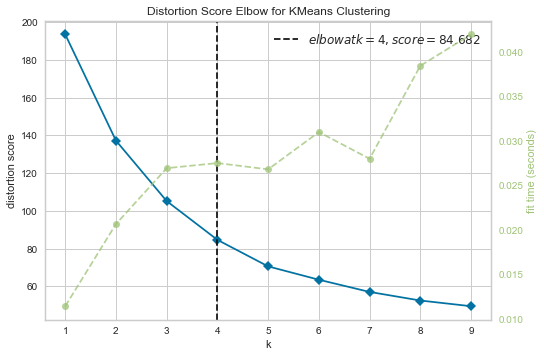

In [34]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

df_indicator = data_scale[['Primary_school_net_enrolment_ratio',
       'drinkingwater_services', 'sanitation_service', 'DTP1β', 'DTP3β',
       'polio3', 'MCV1', 'MCV2', 'HepB3', 'Hib3', 'rota', 'PCV3',
       'mobile_phone', 'internet']]

elbow = kelbow_visualizer(KMeans(random_state = 0), df_indicator, k=(1,10))

In [35]:
km = KMeans(n_clusters = elbow.elbow_value_, random_state = 0)
clusters = km.fit_predict(df_indicator)
data_scale['label'] = clusters
data_imputed['label'] = clusters
data_imputed

,Under5_mortality_rate,Primary_school_net_enrolment_ratio,drinkingwater_services,sanitation_service,DTP1β,DTP3β,polio3,MCV1,MCV2,HepB3,Hib3,rota,PCV3,mobile_phone,internet,pop_total,pop_under5,pop_urbanized,label
0,70.0,96.375438,62.980208,39.220433,73.0,65.0,60.0,62.0,39.0,65.0,65.0,0.0,65.0,66.003744,10.595726,34656.032,5232.848000,27.132,3
1,14.0,95.517310,91.394333,97.690655,99.0,98.0,98.0,96.0,98.0,98.0,98.0,0.0,98.0,105.062312,66.363445,2926.348,177.372000,58.376,2
2,25.0,97.062150,93.466427,87.487686,96.0,91.0,91.0,94.0,96.0,91.0,91.0,0.0,61.0,117.020110,42.945527,40606.052,4699.122000,71.304,0
3,3.0,91.475618,100.000000,100.000000,99.0,98.0,98.0,97.0,90.0,94.0,98.0,0.0,92.0,87.189733,97.930637,77.281,3.410533,84.612,2
4,83.0,84.012310,41.005868,39.429423,79.0,64.0,66.0,49.0,26.0,64.0,64.0,53.0,58.0,55.275647,13.000000,28813.463,5277.122000,44.819,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,16.0,89.856750,97.417224,94.934390,98.0,84.0,82.0,88.0,53.0,84.0,84.0,47.0,7.0,86.989817,60.000000,31568.179,2974.249000,89.043,0
191,22.0,97.965110,91.191766,78.237448,96.0,96.0,95.0,99.0,95.0,96.0,96.0,0.0,0.0,128.037926,46.500000,94569.072,7760.728000,34.236,0
192,55.0,84.837330,70.358863,59.682680,76.0,71.0,65.0,70.0,49.0,71.0,71.0,59.0,71.0,67.169902,24.579208,27584.213,4075.161000,35.187,1
193,63.0,87.404110,61.225308,31.111810,99.0,91.0,87.0,93.0,58.0,91.0,91.0,90.0,90.0,74.947742,25.506579,16591.390,2820.123000,41.379,1


In [36]:
cluster_stat = data_imputed.groupby('label', as_index = False).mean()
cluster_stat.head()

,label,Under5_mortality_rate,Primary_school_net_enrolment_ratio,drinkingwater_services,sanitation_service,DTP1β,DTP3β,polio3,MCV1,MCV2,HepB3,Hib3,rota,PCV3,mobile_phone,internet,pop_total,pop_under5,pop_urbanized
0,0,15.859649,93.209386,95.195182,87.976185,96.824561,94.298246,93.701754,93.210526,88.280702,93.578947,87.333333,8.456140,2.859649,117.655078,55.313856,70391.130421,5544.898807,58.067018
1,1,57.431818,81.346870,68.650444,40.597573,93.500000,86.590909,85.681818,84.568182,42.772727,86.590909,86.090909,73.431818,83.840909,84.675277,22.147004,17129.324227,2524.998818,43.297591
2,2,10.343284,94.658792,97.495795,94.878744,97.522388,95.074627,94.835821,94.552239,88.044776,80.776119,94.970149,41.522388,91.716418,122.199663,73.018433,27893.128821,1928.013774,73.008970
3,3,65.444444,80.457370,69.144299,47.350599,74.000000,61.592593,62.481481,61.629630,17.296296,61.666667,61.851852,6.407407,26.111111,70.697237,20.304858,29344.936444,4369.208904,42.747074


In [37]:
data_final = pd.merge(country, data_imputed, left_index = True, right_index = True)
data_final

,country,Under5_mortality_rate,Primary_school_net_enrolment_ratio,drinkingwater_services,sanitation_service,DTP1β,DTP3β,polio3,MCV1,MCV2,HepB3,Hib3,rota,PCV3,mobile_phone,internet,pop_total,pop_under5,pop_urbanized,label
0,Afghanistan,70.0,96.375438,62.980208,39.220433,73.0,65.0,60.0,62.0,39.0,65.0,65.0,0.0,65.0,66.003744,10.595726,34656.032,5232.848000,27.132,3
1,Albania,14.0,95.517310,91.394333,97.690655,99.0,98.0,98.0,96.0,98.0,98.0,98.0,0.0,98.0,105.062312,66.363445,2926.348,177.372000,58.376,2
2,Algeria,25.0,97.062150,93.466427,87.487686,96.0,91.0,91.0,94.0,96.0,91.0,91.0,0.0,61.0,117.020110,42.945527,40606.052,4699.122000,71.304,0
3,Andorra,3.0,91.475618,100.000000,100.000000,99.0,98.0,98.0,97.0,90.0,94.0,98.0,0.0,92.0,87.189733,97.930637,77.281,3.410533,84.612,2
4,Angola,83.0,84.012310,41.005868,39.429423,79.0,64.0,66.0,49.0,26.0,64.0,64.0,53.0,58.0,55.275647,13.000000,28813.463,5277.122000,44.819,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela (Bolivarian Republic of),16.0,89.856750,97.417224,94.934390,98.0,84.0,82.0,88.0,53.0,84.0,84.0,47.0,7.0,86.989817,60.000000,31568.179,2974.249000,89.043,0
191,Viet Nam,22.0,97.965110,91.191766,78.237448,96.0,96.0,95.0,99.0,95.0,96.0,96.0,0.0,0.0,128.037926,46.500000,94569.072,7760.728000,34.236,0
192,Yemen,55.0,84.837330,70.358863,59.682680,76.0,71.0,65.0,70.0,49.0,71.0,71.0,59.0,71.0,67.169902,24.579208,27584.213,4075.161000,35.187,1
193,Zambia,63.0,87.404110,61.225308,31.111810,99.0,91.0,87.0,93.0,58.0,91.0,91.0,90.0,90.0,74.947742,25.506579,16591.390,2820.123000,41.379,1


In [117]:
data_final.to_csv(r'/Users/chaoiting/Desktop/competition/data_final.csv')

In [41]:
cluster0 = data_scale[data_scale['label'] == 0]
cluster1 = data_scale[data_scale['label'] == 1]
cluster2 = data_scale[data_scale['label'] == 2]
cluster3 = data_scale[data_scale['label'] == 3]
print(len(cluster0))
print(len(cluster1))
print(len(cluster2))
print(len(cluster3))

57
44
67
27


## Cluster 0

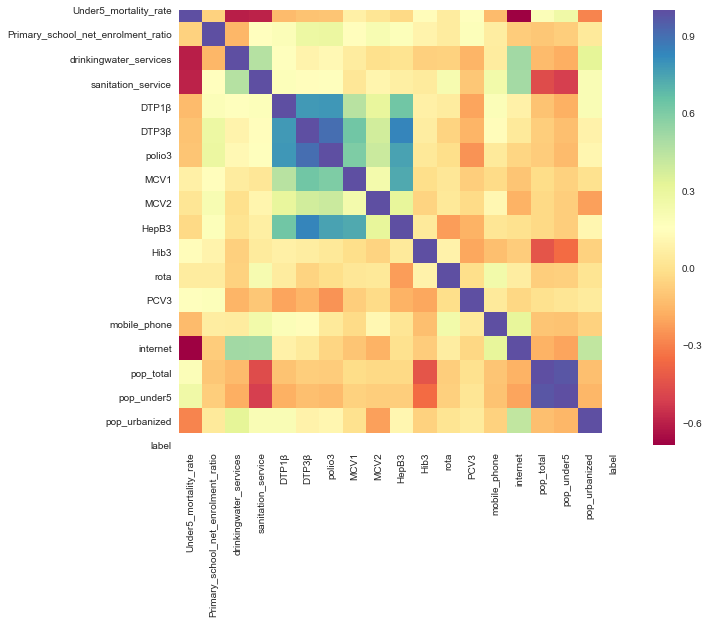

In [44]:
import seaborn as sns

plt.figure(figsize=(10,8))
cluster0_corr = cluster0.corr()
cluster0
sns.heatmap(cluster0_corr, cmap = 'Spectral')

In [56]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
gbrt_grid = {'max_depth': [2, 3, 4, 5], 
             'min_samples_split': [2, 3, 4, 5],
             'learning_rate': [0.01, 0.1, 0.5, 1]}
feature_name = data_scale[[
       'Primary_school_net_enrolment_ratio',
       'drinkingwater_services', 'sanitation_service', 'DTP1β', 'DTP3β',
       'polio3', 'MCV1', 'MCV2', 'HepB3', 'Hib3', 'rota', 'PCV3',
       'mobile_phone', 'internet'
]].columns.tolist()

In [57]:
X_cluster0 = cluster0[[
       'Primary_school_net_enrolment_ratio',
       'drinkingwater_services', 'sanitation_service', 'DTP1β', 'DTP3β',
       'polio3', 'MCV1', 'MCV2', 'HepB3', 'Hib3', 'rota', 'PCV3',
       'mobile_phone', 'internet'
]]
y_cluster0 = cluster0['Under5_mortality_rate']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Text(0.5, 1.0, 'GBRT cluster0 Variable Importance')

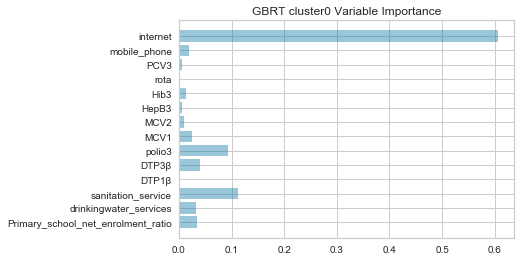

In [58]:
gbrt_grid_search_cluster0 = GridSearchCV(GradientBoostingRegressor(random_state = 0), gbrt_grid, cv=5, return_train_score=True)
gbrt_grid_search_cluster0.fit(X_cluster0, y_cluster0)

gbrt_params_cluster0 = gbrt_grid_search_cluster0.best_params_
gbrt_cluster0 = GradientBoostingRegressor(**gbrt_params_cluster0, random_state = 0)
gbrt_cluster0.fit(X_cluster0, y_cluster0)
gbrt_feature_importance_cluster0 = gbrt_cluster0.feature_importances_

gbrt_cluster0_Variable_Importance = pd.DataFrame({'Feature':feature_name, 
                                                  'Importance_cluster0': gbrt_feature_importance_cluster0})
%matplotlib inline
y_list = gbrt_feature_importance_cluster0
y_pos = np.arange(len(y_list))
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, feature_name)
plt.title('GBRT cluster0 Variable Importance')

Text(0.5, 0, '$\\alpha$')

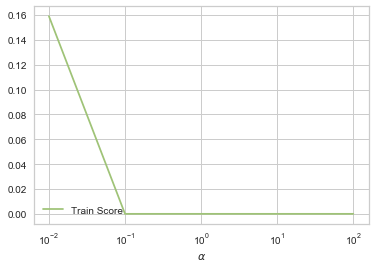

In [59]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

x_range = [0.01, 0.1, 1, 10, 100]

cluster0_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha, random_state = 0)
    lasso.fit(X_cluster0, y_cluster0)
    cluster0_score_list.append(lasso.score(X_cluster0, y_cluster0))

plt.plot(x_range, cluster0_score_list, c = 'g', label = 'Train Score')

plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [62]:
lasso = Lasso(alpha = 0.01, random_state = 0)
lasso.fit(X_cluster0, y_cluster0)
lassoCoef_cluster0= lasso.coef_.tolist()

lassoCoef_cluster0 = pd.DataFrame({'Feature':feature_name, 
                                   'Coef_cluster0': lassoCoef_cluster0})
lassoCoef_cluster0[lassoCoef_cluster0['Coef_cluster0']!=0]

,Feature,Coef_cluster0
13,internet,-0.057723


In [116]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

results0 = smf.ols('Under5_mortality_rate ~ internet'
                   , data = cluster0).fit()

print(results0.summary())

                              OLS Regression Results                             
Dep. Variable:     Under5_mortality_rate   R-squared:                       0.489
Model:                               OLS   Adj. R-squared:                  0.470
Method:                    Least Squares   F-statistic:                     25.85
Date:                   Sat, 02 May 2020   Prob (F-statistic):           1.34e-08
Time:                           19:04:11   Log-Likelihood:                 75.557
No. Observations:                     57   AIC:                            -145.1
Df Residuals:                         54   BIC:                            -139.0
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4187 

## Cluster 1

In [69]:
X_cluster1 = cluster1[[
       'Primary_school_net_enrolment_ratio',
       'drinkingwater_services', 'sanitation_service', 'DTP1β', 'DTP3β',
       'polio3', 'MCV1', 'MCV2', 'HepB3', 'Hib3', 'rota', 'PCV3',
       'mobile_phone', 'internet'
]]
y_cluster1 = cluster1['Under5_mortality_rate']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Text(0.5, 1.0, 'GBRT cluster1 Variable Importance')

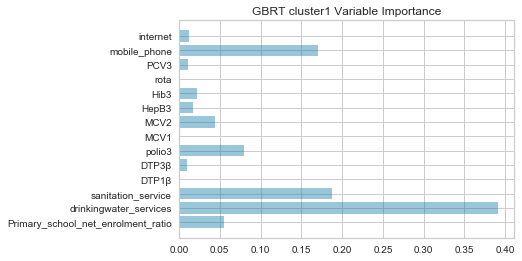

In [70]:
gbrt_grid_search_cluster1 = GridSearchCV(GradientBoostingRegressor(random_state = 0), gbrt_grid, cv=5, return_train_score=True)
gbrt_grid_search_cluster1.fit(X_cluster1, y_cluster1)

gbrt_params_cluster1 = gbrt_grid_search_cluster1.best_params_
gbrt_cluster1 = GradientBoostingRegressor(**gbrt_params_cluster1, random_state = 0)
gbrt_cluster1.fit(X_cluster1, y_cluster1)
gbrt_feature_importance_cluster1 = gbrt_cluster1.feature_importances_

gbrt_cluster1_Variable_Importance = pd.DataFrame({'Feature':feature_name, 
                                                  'Importance_cluster1': gbrt_feature_importance_cluster1})
%matplotlib inline
y_list = gbrt_feature_importance_cluster1
y_pos = np.arange(len(y_list))
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, feature_name)
plt.title('GBRT cluster1 Variable Importance')

Text(0.5, 0, '$\\alpha$')

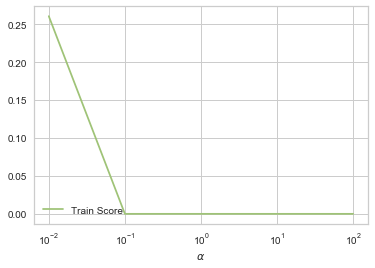

In [71]:
cluster1_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha, random_state = 0)
    lasso.fit(X_cluster1, y_cluster1)
    cluster1_score_list.append(lasso.score(X_cluster1, y_cluster1))

plt.plot(x_range, cluster1_score_list, c = 'g', label = 'Train Score')

plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [73]:
lasso = Lasso(alpha = 0.01, random_state = 0)
lasso.fit(X_cluster1, y_cluster1)
lassoCoef_cluster1= lasso.coef_.tolist()

lassoCoef_cluster1 = pd.DataFrame({'Feature':feature_name, 
                                   'Coef_cluster1': lassoCoef_cluster1})
lassoCoef_cluster1[lassoCoef_cluster1['Coef_cluster1']!=0]

,Feature,Coef_cluster1
2,sanitation_service,-0.253936


In [115]:
results1 = smf.ols('Under5_mortality_rate ~ sanitation_service'
                   , data = cluster1).fit()

print(results1.summary())

                              OLS Regression Results                             
Dep. Variable:     Under5_mortality_rate   R-squared:                       0.319
Model:                               OLS   Adj. R-squared:                  0.303
Method:                    Least Squares   F-statistic:                     19.65
Date:                   Sat, 02 May 2020   Prob (F-statistic):           6.55e-05
Time:                           19:03:02   Log-Likelihood:                 21.358
No. Observations:                     44   AIC:                            -38.72
Df Residuals:                         42   BIC:                            -35.15
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Interc

## Cluster 2

In [79]:
X_cluster2 = cluster2[[
       'Primary_school_net_enrolment_ratio',
       'drinkingwater_services', 'sanitation_service', 'DTP1β', 'DTP3β',
       'polio3', 'MCV1', 'MCV2', 'HepB3', 'Hib3', 'rota', 'PCV3',
       'mobile_phone', 'internet'
]]
y_cluster2 = cluster2['Under5_mortality_rate']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Text(0.5, 1.0, 'GBRT cluster2 Variable Importance')

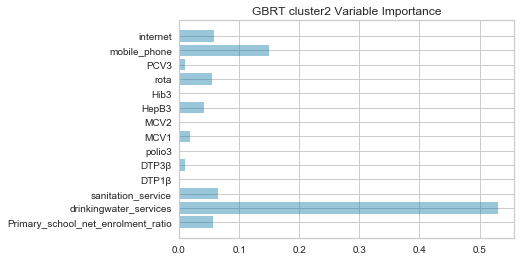

In [80]:
gbrt_grid_search_cluster2 = GridSearchCV(GradientBoostingRegressor(random_state = 0), gbrt_grid, cv=5, return_train_score=True)
gbrt_grid_search_cluster2.fit(X_cluster2, y_cluster2)

gbrt_params_cluster2 = gbrt_grid_search_cluster2.best_params_
gbrt_cluster2 = GradientBoostingRegressor(**gbrt_params_cluster2, random_state = 0)
gbrt_cluster2.fit(X_cluster2, y_cluster2)
gbrt_feature_importance_cluster2 = gbrt_cluster2.feature_importances_

gbrt_cluster2_Variable_Importance = pd.DataFrame({'Feature':feature_name, 
                                                  'Importance_cluster2': gbrt_feature_importance_cluster2})
%matplotlib inline
y_list = gbrt_feature_importance_cluster2
y_pos = np.arange(len(y_list))
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, feature_name)
plt.title('GBRT cluster2 Variable Importance')

Text(0.5, 0, '$\\alpha$')

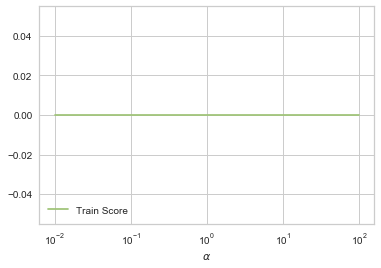

In [81]:
cluster2_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha, random_state = 0)
    lasso.fit(X_cluster2, y_cluster2)
    cluster2_score_list.append(lasso.score(X_cluster2, y_cluster2))

plt.plot(x_range, cluster2_score_list, c = 'g', label = 'Train Score')

plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [82]:
lasso = Lasso(alpha = 0.01, random_state = 0)
lasso.fit(X_cluster2, y_cluster2)
lassoCoef_cluster2= lasso.coef_.tolist()

lassoCoef_cluster2 = pd.DataFrame({'Feature':feature_name, 
                                   'Coef_cluster2': lassoCoef_cluster2})
lassoCoef_cluster2[lassoCoef_cluster2['Coef_cluster2']!=0]

,Feature,Coef_cluster2


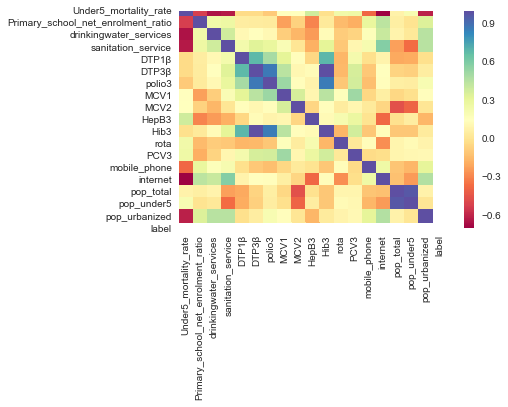

In [88]:
corr_cluster2 = cluster2.corr()
sns.heatmap(corr_cluster2, cmap = 'Spectral')

In [109]:
results2 = smf.ols('Under5_mortality_rate ~ drinkingwater_services + mobile_phone'
                   , data = cluster2).fit()

print(results2.summary())

                              OLS Regression Results                             
Dep. Variable:     Under5_mortality_rate   R-squared:                       0.497
Model:                               OLS   Adj. R-squared:                  0.482
Method:                    Least Squares   F-statistic:                     31.68
Date:                   Sat, 02 May 2020   Prob (F-statistic):           2.74e-10
Time:                           19:00:45   Log-Likelihood:                 116.51
No. Observations:                     67   AIC:                            -227.0
Df Residuals:                         64   BIC:                            -220.4
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

## Cluster 3

In [92]:
X_cluster3 = cluster3[[
       'Primary_school_net_enrolment_ratio',
       'drinkingwater_services', 'sanitation_service', 'DTP1β', 'DTP3β',
       'polio3', 'MCV1', 'MCV2', 'HepB3', 'Hib3', 'rota', 'PCV3',
       'mobile_phone', 'internet'
]]
y_cluster3 = cluster3['Under5_mortality_rate']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Text(0.5, 1.0, 'GBRT cluster3 Variable Importance')

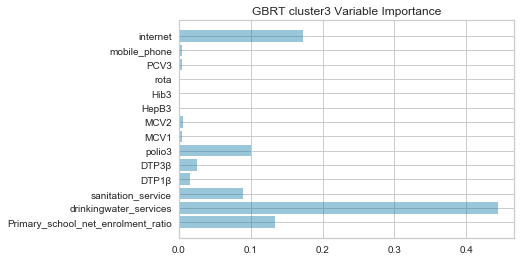

In [93]:
gbrt_grid_search_cluster3 = GridSearchCV(GradientBoostingRegressor(random_state = 0), gbrt_grid, cv=5, return_train_score=True)
gbrt_grid_search_cluster3.fit(X_cluster3, y_cluster3)

gbrt_params_cluster3 = gbrt_grid_search_cluster3.best_params_
gbrt_cluster3 = GradientBoostingRegressor(**gbrt_params_cluster3, random_state = 0)
gbrt_cluster3.fit(X_cluster3, y_cluster3)
gbrt_feature_importance_cluster3 = gbrt_cluster3.feature_importances_

gbrt_cluster3_Variable_Importance = pd.DataFrame({'Feature':feature_name, 
                                                  'Importance_cluster3': gbrt_feature_importance_cluster3})
%matplotlib inline
y_list = gbrt_feature_importance_cluster3
y_pos = np.arange(len(y_list))
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, feature_name)
plt.title('GBRT cluster3 Variable Importance')

Text(0.5, 0, '$\\alpha$')

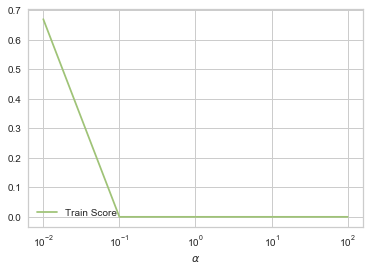

In [94]:
cluster3_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha, random_state = 0)
    lasso.fit(X_cluster3, y_cluster3)
    cluster3_score_list.append(lasso.score(X_cluster3, y_cluster3))

plt.plot(x_range, cluster3_score_list, c = 'g', label = 'Train Score')

plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [95]:
lasso = Lasso(alpha = 0.01, random_state = 0)
lasso.fit(X_cluster3, y_cluster3)
lassoCoef_cluster3 = lasso.coef_.tolist()

lassoCoef_cluster3 = pd.DataFrame({'Feature':feature_name, 
                                   'Coef_cluster3': lassoCoef_cluster3})
lassoCoef_cluster3[lassoCoef_cluster3['Coef_cluster3']!=0]

,Feature,Coef_cluster3
0,Primary_school_net_enrolment_ratio,-0.043397
1,drinkingwater_services,-0.166999
2,sanitation_service,-0.444264
3,DTP1β,-0.012772
5,polio3,-0.128745


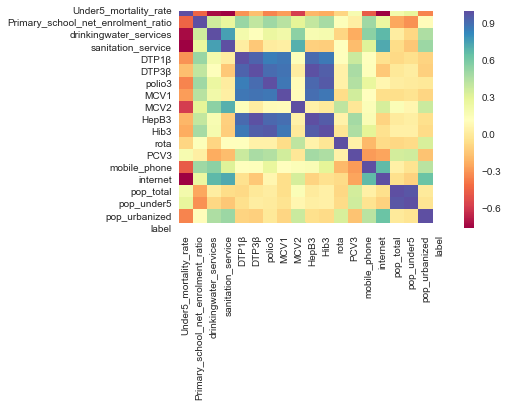

In [97]:
corr_cluster3 = cluster3.corr()
sns.heatmap(corr_cluster3, cmap = 'Spectral')

In [108]:
results3 = smf.ols('Under5_mortality_rate ~ sanitation_service + polio3'
                   , data = cluster3).fit()

print(results3.summary()) 

                              OLS Regression Results                             
Dep. Variable:     Under5_mortality_rate   R-squared:                       0.693
Model:                               OLS   Adj. R-squared:                  0.667
Method:                    Least Squares   F-statistic:                     27.06
Date:                   Sat, 02 May 2020   Prob (F-statistic):           7.06e-07
Time:                           19:00:37   Log-Likelihood:                 12.662
No. Observations:                     27   AIC:                            -19.32
Df Residuals:                         24   BIC:                            -15.44
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Interc